In [35]:
#Including all the required libraries:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [36]:
#Selecting a stock and loading historical data:
ticker = '005930.KS'
data = yf.download(ticker, start='2020-01-01', end='2024-12-31')

/tmp/ipython-input-36-580226328.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [37]:
#Predicting the next close price:
data['Next Close Price'] = data['Close'].shift(-1)

In [38]:
#Dropping the last row (it has NaN in 'Target')
data = data[:-1]

In [39]:
#Selecting features for Next Close Price:
features = data[['Open', 'High', 'Low', 'Volume']]
nextClosePrice = data['Next Close Price']

In [40]:
#Splitting into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, nextClosePrice, test_size=0.2, shuffle=False)

In [41]:
#Training a linear regression model:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
#Predicting the closing prices on the test set:
predicted_prices = model.predict(X_test)

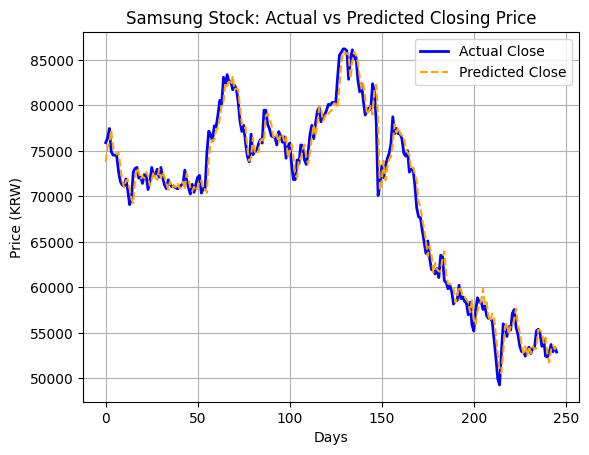

In [43]:
#Plotting actual vs predicted closing prices for comparison:
plt.plot(y_test.values, label='Actual Close', color='blue', linewidth=2)
plt.plot(predicted_prices, label='Predicted Close', color='orange', linestyle='--')
plt.title('Samsung Stock: Actual vs Predicted Closing Price')
plt.xlabel('Days')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)
plt.show()
